## Exercise 1 - American Airlines Employees

The following repository

https://drive.google.com/drive/folders/1MBXTCbUJbX6kRo4fnjsbOGvOZZ7SQFkV?usp=sharing

contains few files with the number of part-time and full-time employees of the major
airline companies in the United States:

- american airline empl.txt

- delta airline empl.txt

- federal express empl.txt

- united airline empl.txt

### 1) read the data and import them in a data.frame or tibble structure

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
american_airline <- read_delim("american_airline_empl.txt")
delta_airline <- read_delim("delta_airline_empl.txt")
federal_express <- read_delim("federal_express_empl.txt")
united_airline <- read_delim("united_airline_empl.txt")

Rows: 397 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (2): Month, Year
num (3): Full-time, Part-time, Grand Total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 397 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (2): Month, Year
num (3): Full-time, Part-time, Grand Total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 397 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (2): Month, Year
num (3): Full-time, Part-time, Grand Total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet thi

### 2) merge the four data tibble in a common tibble

I add a column with a company name in order to add tibbles to each other row by row without losing information about the company. After I add them together and shuffle with sample_frac to show that everything is there.

In [3]:
names = c("American airline", "Delta airline", "Federal express", "United airline")

In [4]:
american_airline$Company <- names[1]
delta_airline$Company <- names[2]
federal_express$Company <- names[3]
united_airline$Company <- names[4]

In [5]:
airlines_USA <- sample_frac(rbind(american_airline,
                  rbind(delta_airline, rbind(federal_express, united_airline))))
print(airlines_USA)

# A tibble: 1,588 × 6
   Month  Year `Full-time` `Part-time` `Grand Total` Company         
   <dbl> <dbl>       <dbl>       <dbl>         <dbl> <chr>           
 1     5  2018       78261       10430         88691 Delta airline   
 2    10  1990       67395       24190         91585 Federal express 
 3    11  1995       52604        8906         61510 Delta airline   
 4    12  2022       91293       12550        103843 American airline
 5     4  2000       65862       13102         78964 Delta airline   
 6    11  2005       50647        6300         56947 United airline  
 7     4  2014       56435        6927         63362 American airline
 8     2  2019       77959       11092         89051 United airline  
 9     2  2017       74327       10365         84692 Delta airline   
10    10  1997       58011       11969         69980 Delta airline   
# … with 1,578 more rows


### 3) produce a plot of the behaviour of the employees as a function of time for all four companies, separately for the number of full-time and part-time employees

Changing names of the two columns so that I can use these names later in ggplot:

In [6]:
lookup <- c(Full_time = "Full-time", Part_time = "Part-time")
airlines_USA = rename(airlines_USA, all_of(lookup))
print(airlines_USA)

# A tibble: 1,588 × 6
   Month  Year Full_time Part_time `Grand Total` Company         
   <dbl> <dbl>     <dbl>     <dbl>         <dbl> <chr>           
 1     5  2018     78261     10430         88691 Delta airline   
 2    10  1990     67395     24190         91585 Federal express 
 3    11  1995     52604      8906         61510 Delta airline   
 4    12  2022     91293     12550        103843 American airline
 5     4  2000     65862     13102         78964 Delta airline   
 6    11  2005     50647      6300         56947 United airline  
 7     4  2014     56435      6927         63362 American airline
 8     2  2019     77959     11092         89051 United airline  
 9     2  2017     74327     10365         84692 Delta airline   
10    10  1997     58011     11969         69980 Delta airline   
# … with 1,578 more rows


Setting default size of the images:

In [7]:
library(repr)
options(repr.plot.width=15, repr.plot.height=10)

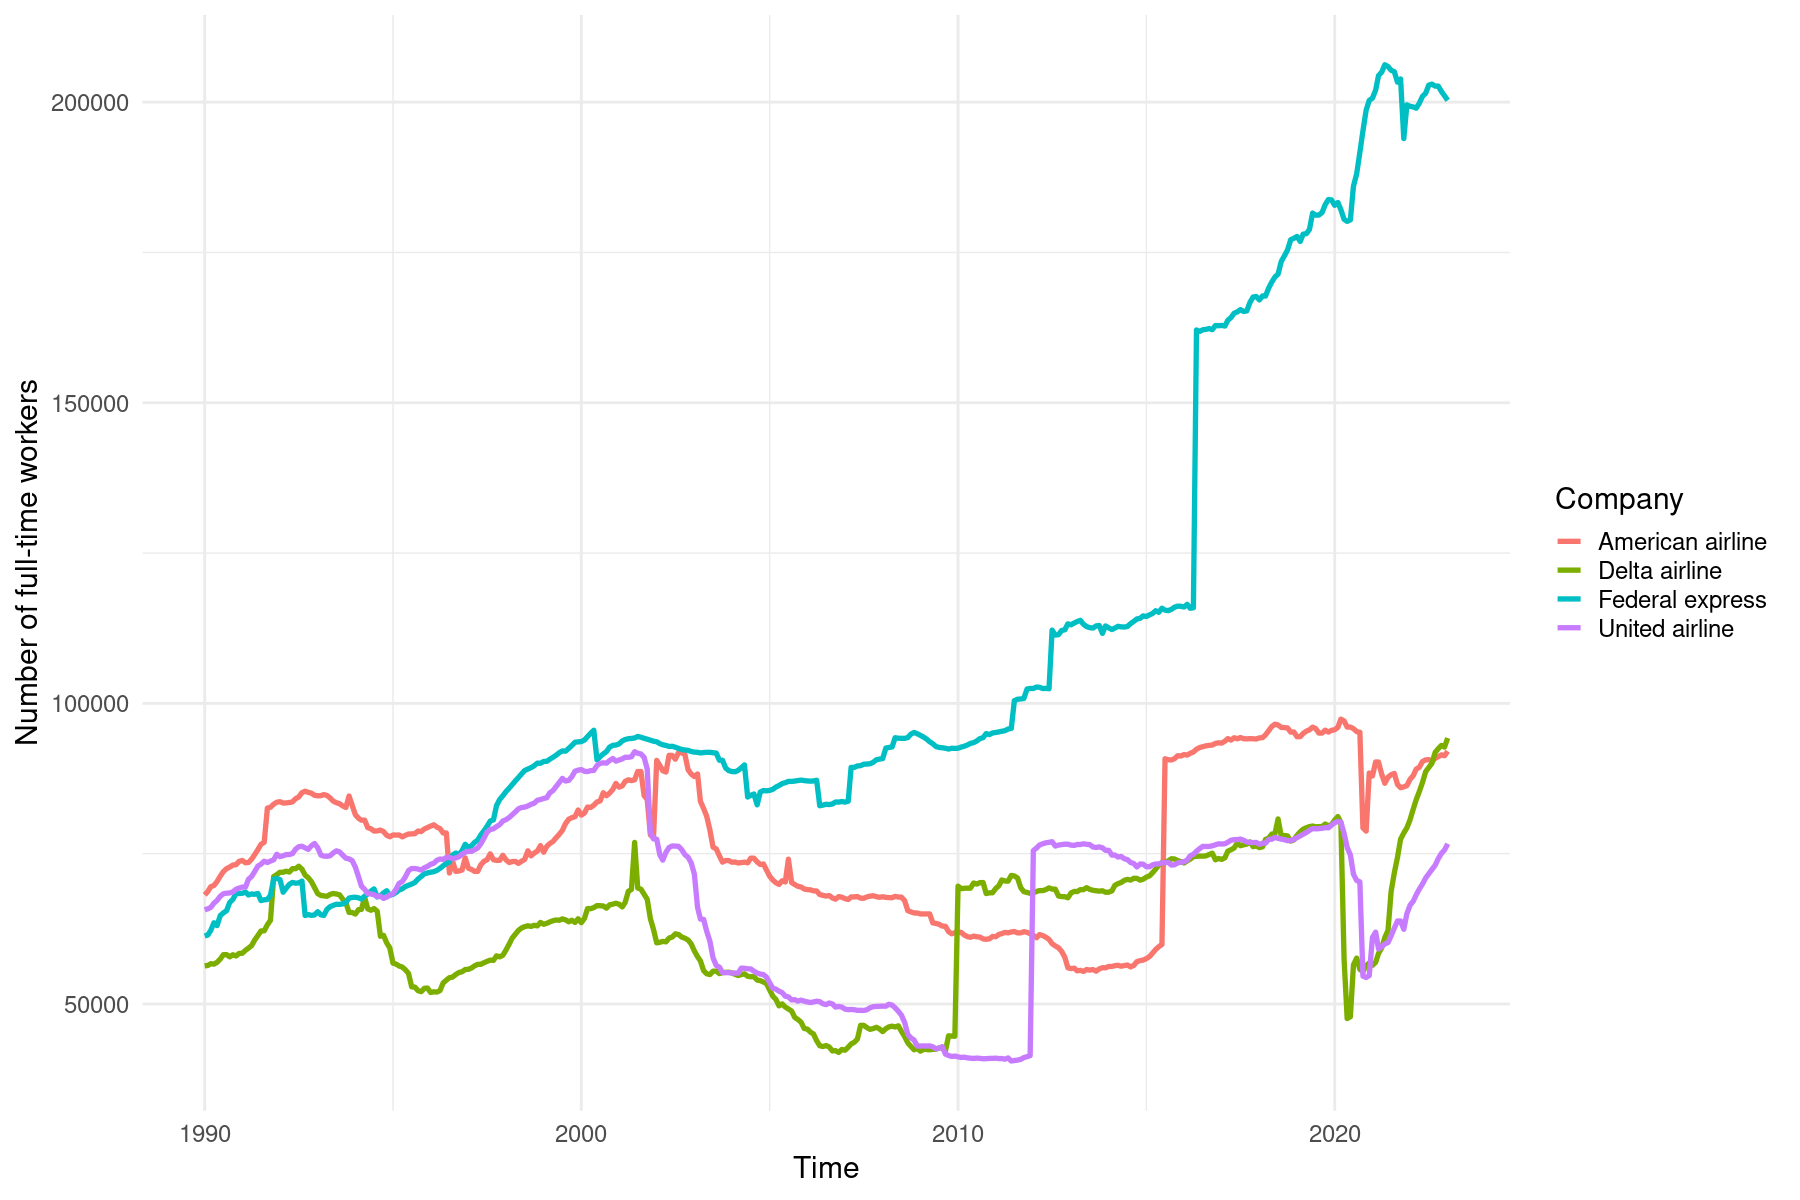

In [8]:
airlines_USA %>%
    select("Month", "Year", "Full_time", "Company") %>%
    mutate(date = make_datetime(Year, Month, 1)) %>%
    ggplot(aes(x = date, y = Full_time, colour=Company)) +
    geom_line(linewidth=1.5) +
    theme_minimal(base_size=18) +
    labs(x="Time", y="Number of full-time workers")

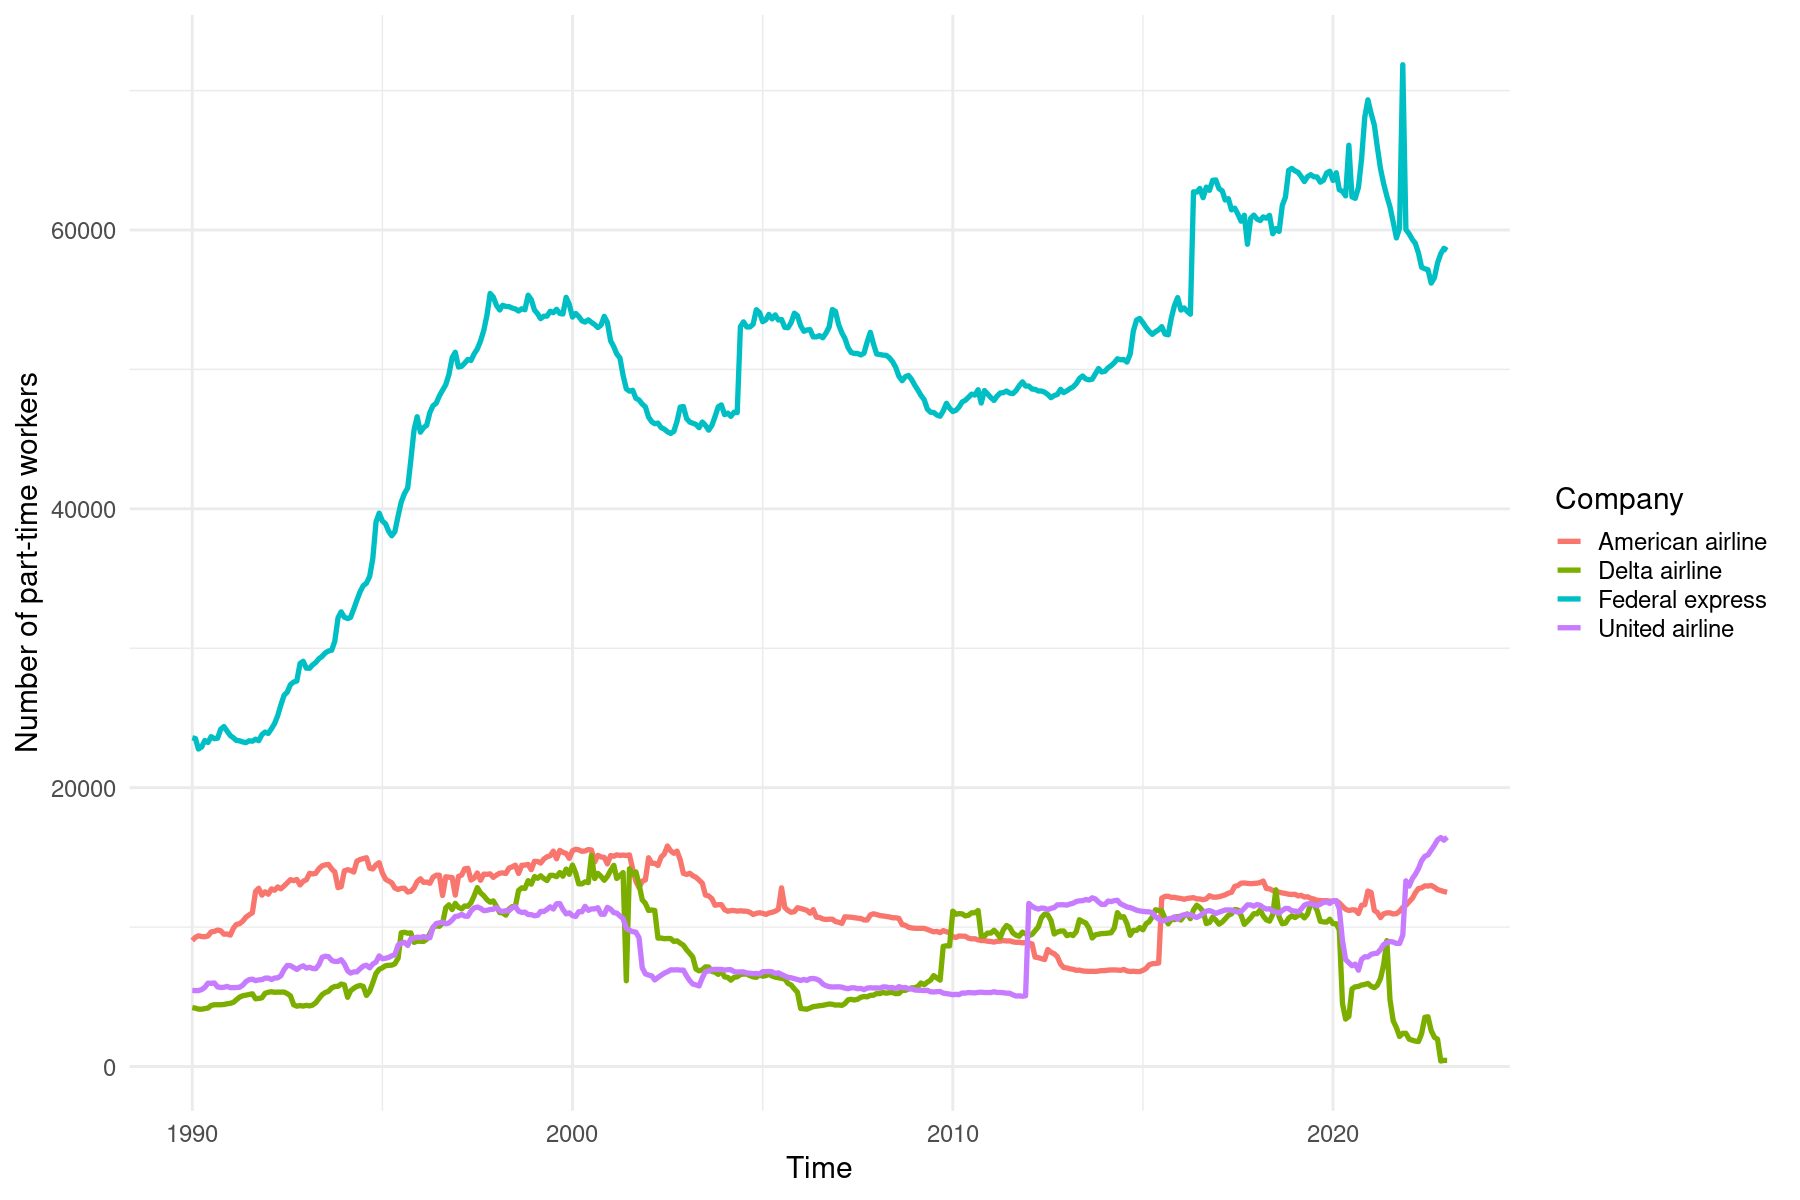

In [9]:
airlines_USA %>%
    select("Month", "Year", "Part_time", "Company") %>%
    mutate(date = make_datetime(Year, Month, 1)) %>%
    ggplot(aes(x = date, y = Part_time, colour=Company)) +
    geom_line(linewidth=1.5) +
    theme_minimal(base_size=18) +
    labs(x="Time", y="Number of part-time workers")

### 4) when did each company reach the minimum and maximum number of employess?

In [10]:
airlines_workers <- mutate(airlines_USA, Workers = Full_time+Part_time)

In [11]:
cat("Maximum number of workers:")
airlines_workers %>%
    filter(Workers %in% summarise(airlines_workers, max = max(Workers), .by=Company)[["max"]]) %>%
    select(Company, Year, Month, Workers)

Maximum number of workers:

Company,Year,Month,Workers
<chr>,<dbl>,<dbl>,<dbl>
Federal express,2021,3,270383
American airline,2018,6,109171
Delta airline,2023,1,94675
United airline,2001,3,102046


In [12]:
cat("Minimum number of workers:")
airlines_workers %>%
    filter(Workers %in% summarise(airlines_workers, min = min(Workers), .by=Company)[["min"]]) %>%
    select(Company, Year, Month, Workers)

Minimum number of workers:

Company,Year,Month,Workers
<chr>,<dbl>,<dbl>,<dbl>
Federal express,1990,1,84885
United airline,2011,6,45781
Delta airline,2006,11,46410
American airline,2013,9,62290


### 5) plot the fraction of part-time workers over the total employees as a function of time

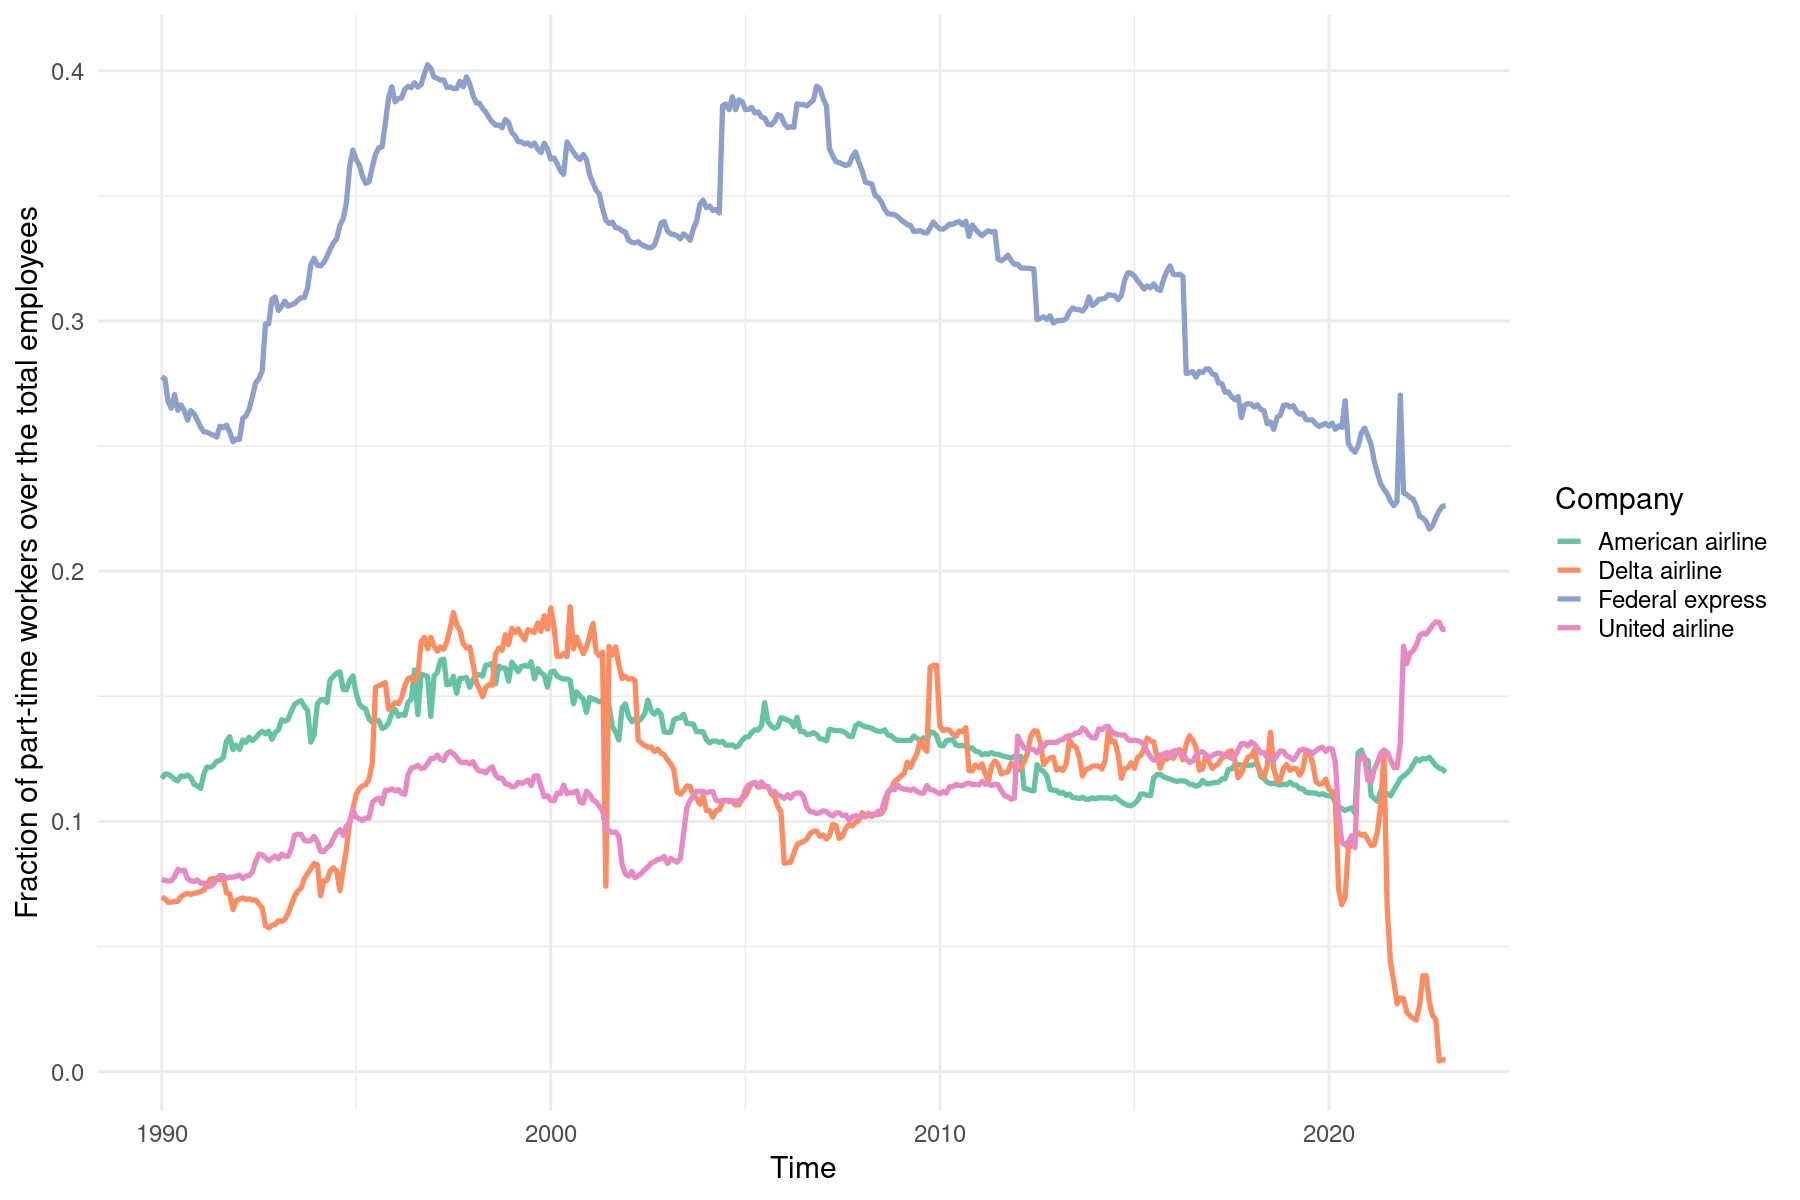

In [13]:
airlines_workers %>%
    select("Month", "Year", "Part_time", "Workers", "Company") %>%
    mutate(date = make_datetime(Year, Month, 1)) %>%
    ggplot(aes(x = date, y = Part_time/Workers, colour=Company)) +
    geom_line(linewidth=1.5) +
    theme_minimal(base_size=18) +
    labs(x="Time", y="Fraction of part-time workers over the total employees") +
    scale_color_brewer(palette = "Set2")

### 6) did the COVID-19 pandemic have any influence in the employed workers of the airline companies? Can you see a trend in the years 2019-2023 ?

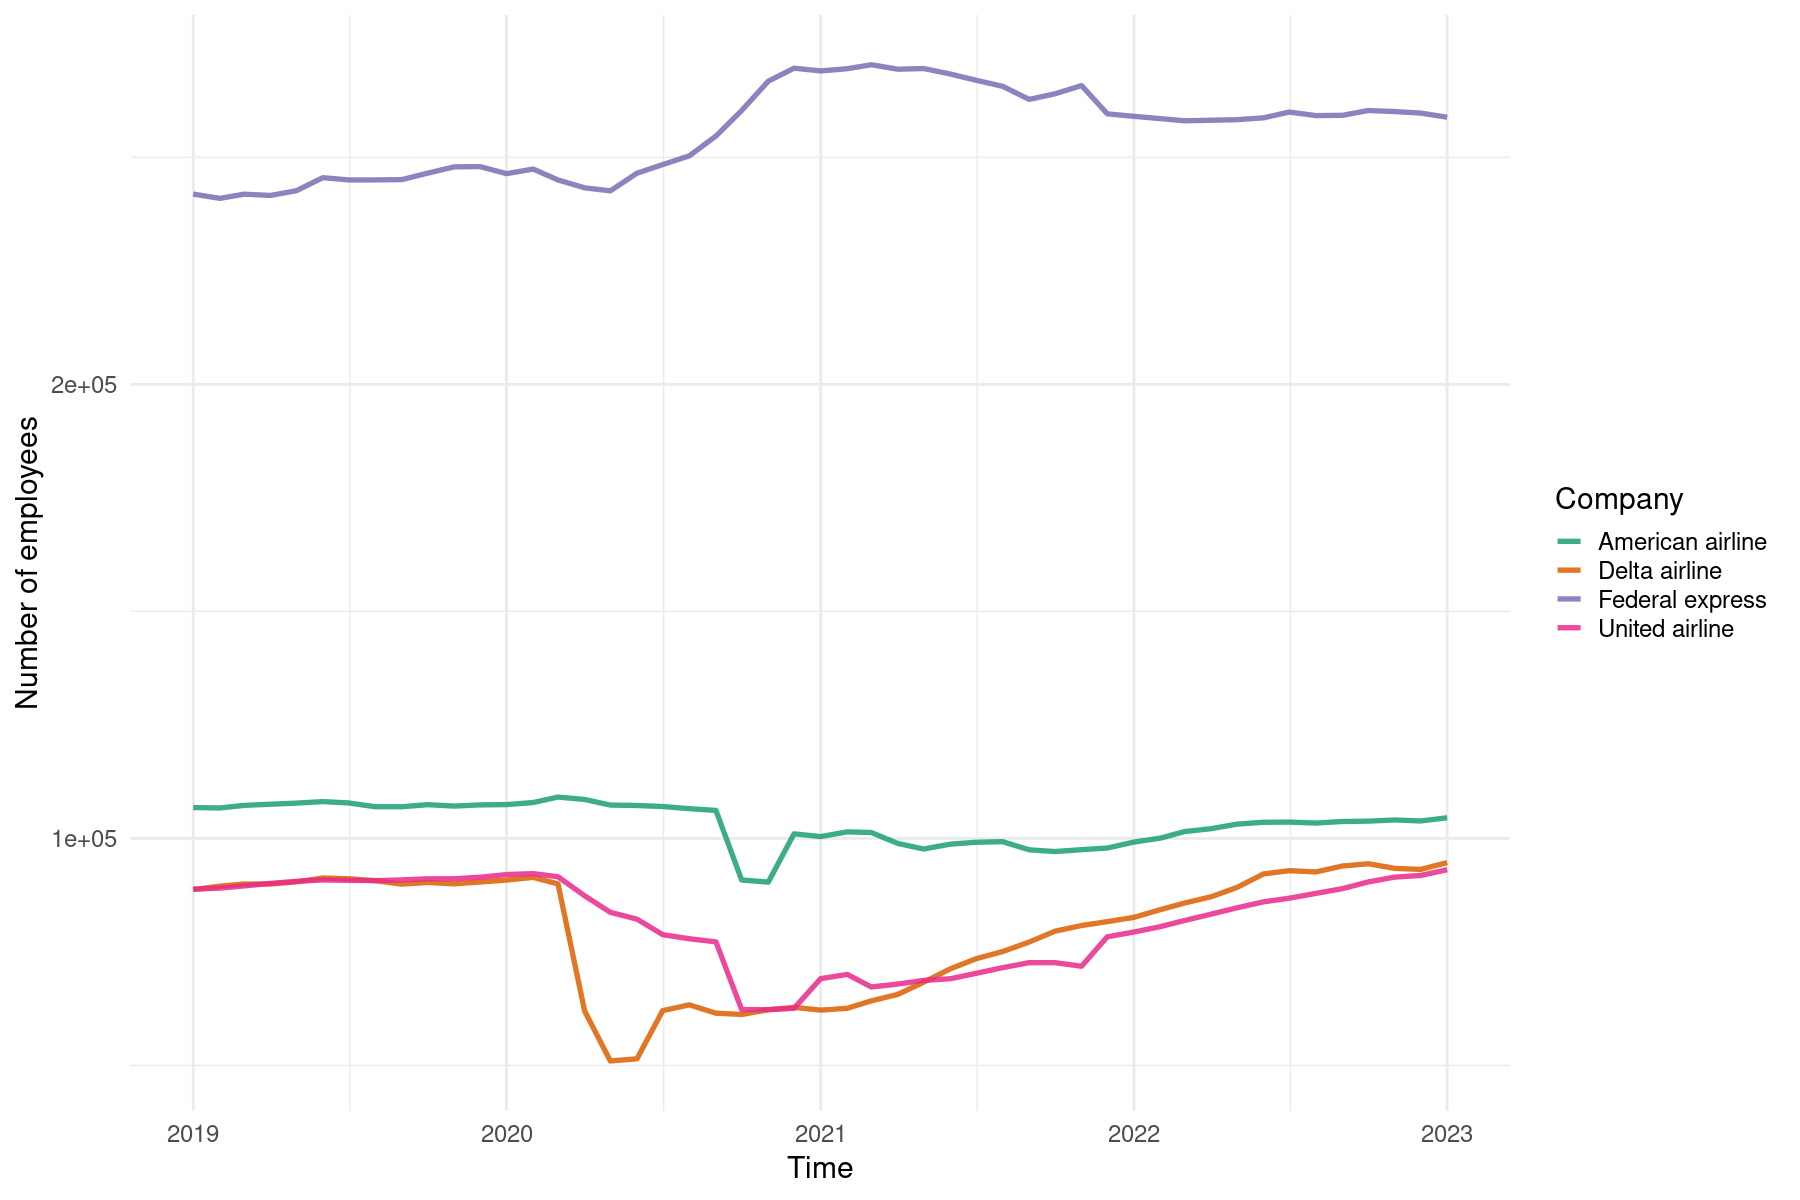

In [14]:
airlines_workers %>%
    filter(Year>=2019) %>%
    select("Month", "Year", "Workers", "Company") %>%
    mutate(date = make_datetime(Year, Month, 1)) %>%
    ggplot(aes(x = date, y = Workers, colour=Company)) +
    geom_line(linewidth=1.5, alpha=0.85) +
    theme_minimal(base_size=18) +
    labs(x="Time", y="Number of employees") +
    scale_color_brewer(palette = "Dark2")

In all companies, except Federal express, in different periods in 2020 number of workers decreased rapidly. Then after the drop it began to slightly increase, reaching pre-pandemic levels by 2023. In Federal express number of employees during 2020 was increasing significantly, but after that this growth stopped.

## Exercise 2 - Data Frames and Tibble

The nycflights13 R package contains data on all flights departing from New Your City airports
in 2013. All available data is organized into four tibbles:

- airlines: contains metadata on airlines names and corresponding carrier codes

- airports: contains metadata on all airports connected to NYC

- flights: has data of all flights departing from the three NYC airports (JFK, LGA and EWR) in 2013

- planes: Plane metadata for all plane numbers found in the FAA aircraft registry.

In [15]:
library(nycflights13)

In [16]:
glimpse(airlines)

Rows: 16
Columns: 2
$ carrier <chr> "9E", "AA", "AS", "B6", "DL", "EV", "F9", "FL", "HA", "MQ", "O…
$ name    <chr> "Endeavor Air Inc.", "American Airlines Inc.", "Alaska Airline…


In [17]:
glimpse(flights)

Rows: 336,776
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558, …
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600, …
$ dep_delay      <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -1…
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849,…
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851,…
$ arr_delay      <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -1…
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6", "…
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301, 4…
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N394…
$ origin      

In [18]:
options(repr.plot.width=15, repr.plot.height=6)

### 1)
### - Plot the total number of flights departed from each of the three NYC airports as a function of time (one entry for each of the 365 days of the year).

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


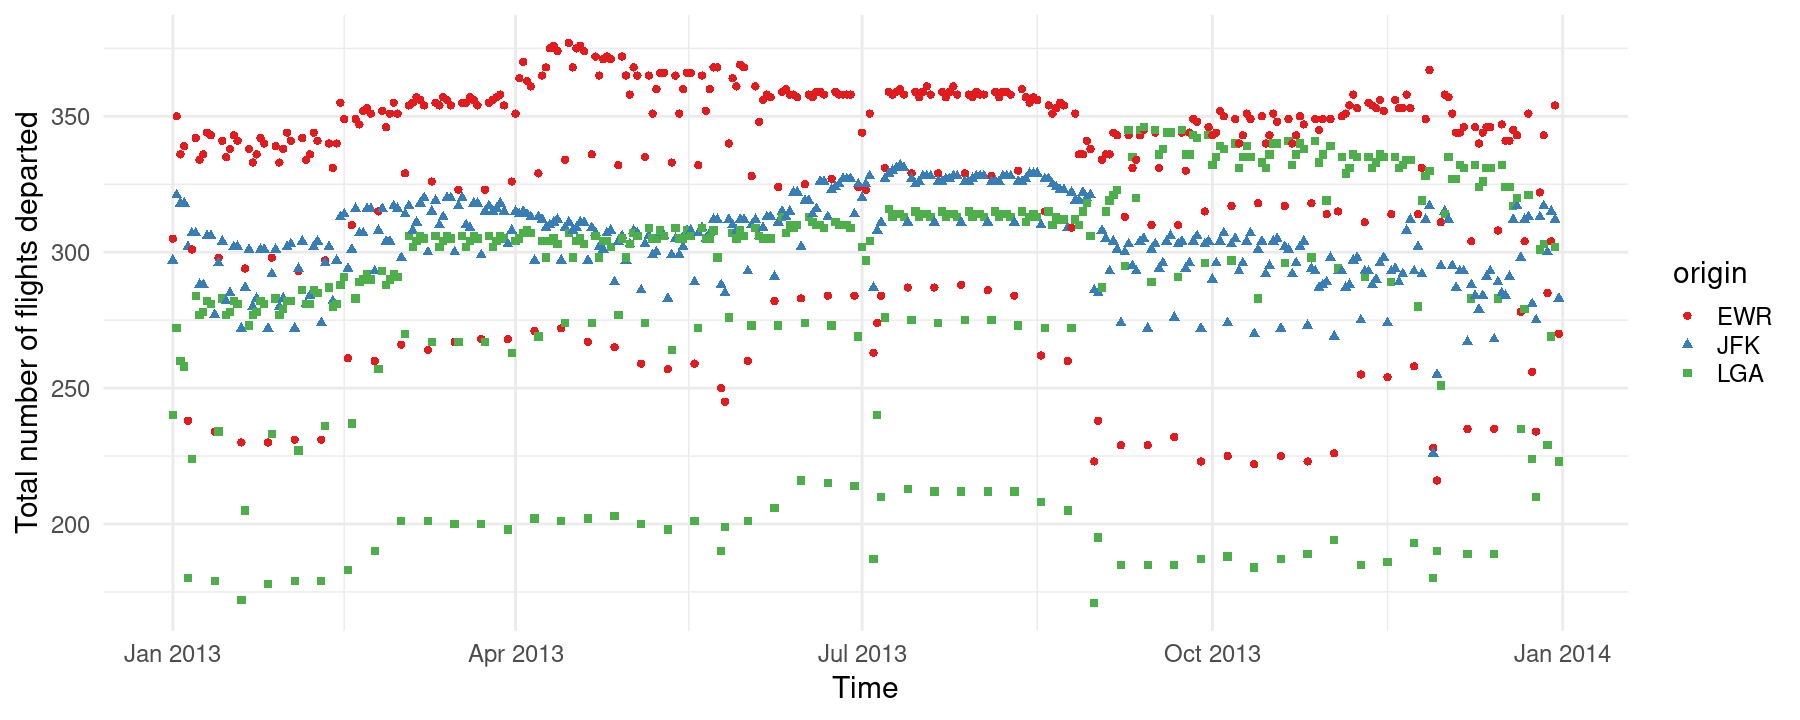

In [19]:
flights %>%
    mutate(date = make_datetime(year, month, day)) %>%
    group_by(date, origin) %>%
    summarise(count = n()) %>%
    ggplot(aes(x = date, y = count, colour=origin, shape=origin)) +
    geom_point(size=2) +
    theme_minimal(base_size=18) +
    labs(x="Time", y="Total number of flights departed") +
    scale_color_brewer(palette = "Set1")

### - Plot the average number of flights computed over the first five working days of each week as a function of the week number of the year. Produce the same plot for the flights departing over the weekend (Saturdays and Sundays).

In [20]:
flights %>%
    mutate(date = make_datetime(year, month, day)) %>%
    mutate(weekday = wday(date, week_start=1)) %>%
    mutate(week = week(date)) -> flights_weekdays #a tibbble that contains weekdays and weeks

`summarise()` has grouped output by 'week'. You can override using the
`.groups` argument.


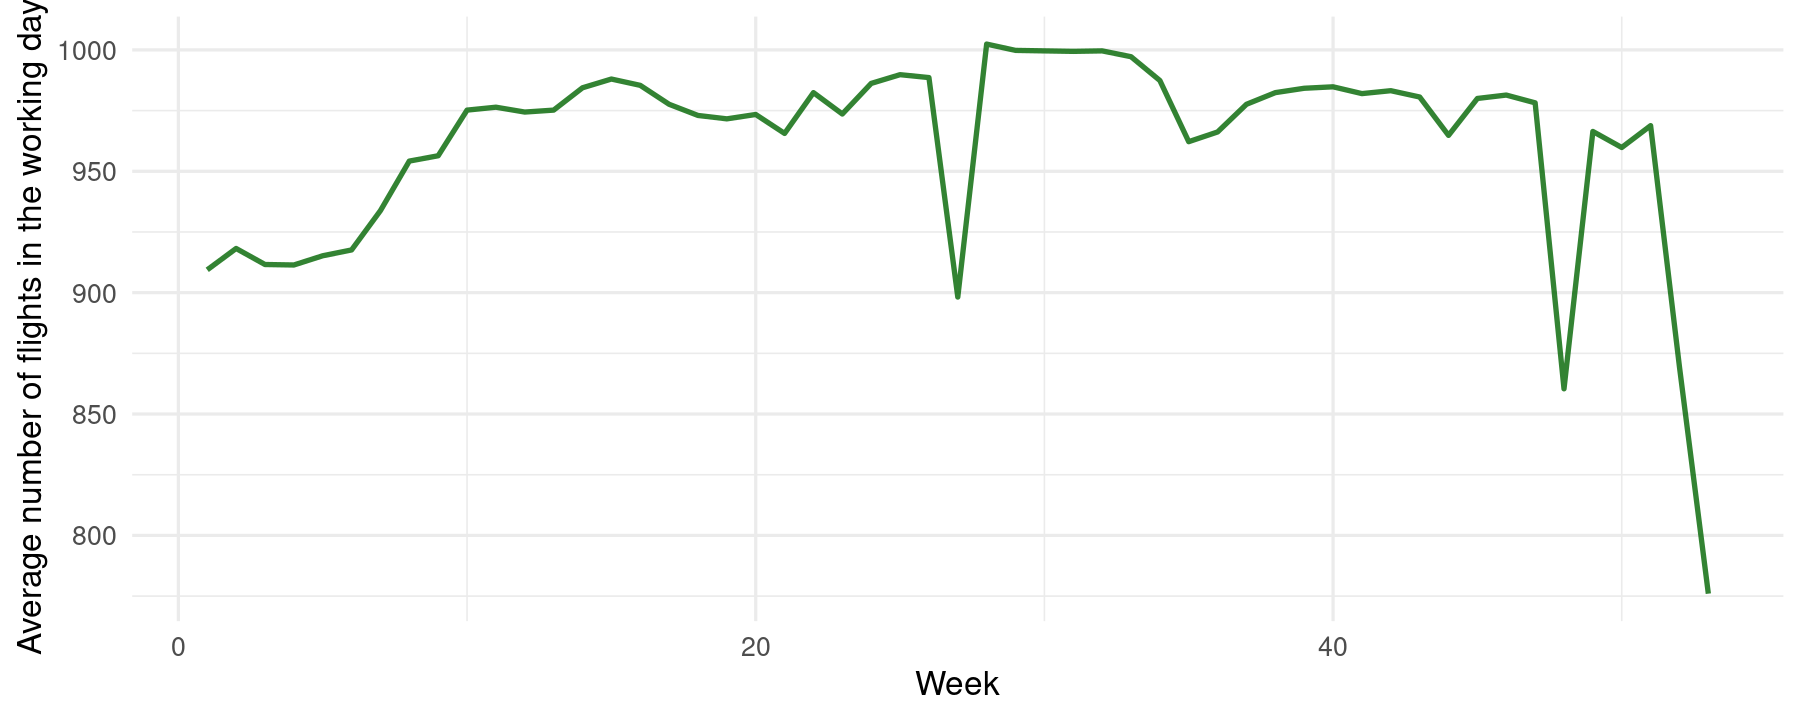

In [21]:
flights_weekdays %>%
    filter(weekday %in% 1:5) %>%
    group_by(week, weekday) %>%
    summarize(w = n()) %>% #counting number of flights during each day of the week
    summarise(avg_working = mean(w)) %>% #taking mean (by week) of the previous number 
    ggplot(aes(x = week, y = avg_working)) +
    geom_line(linewidth=1.5, alpha=0.8, colour="darkgreen") +
    theme_minimal(base_size=20) +
    labs(x="Week", y="Average number of flights in the working days")

`summarise()` has grouped output by 'week'. You can override using the
`.groups` argument.


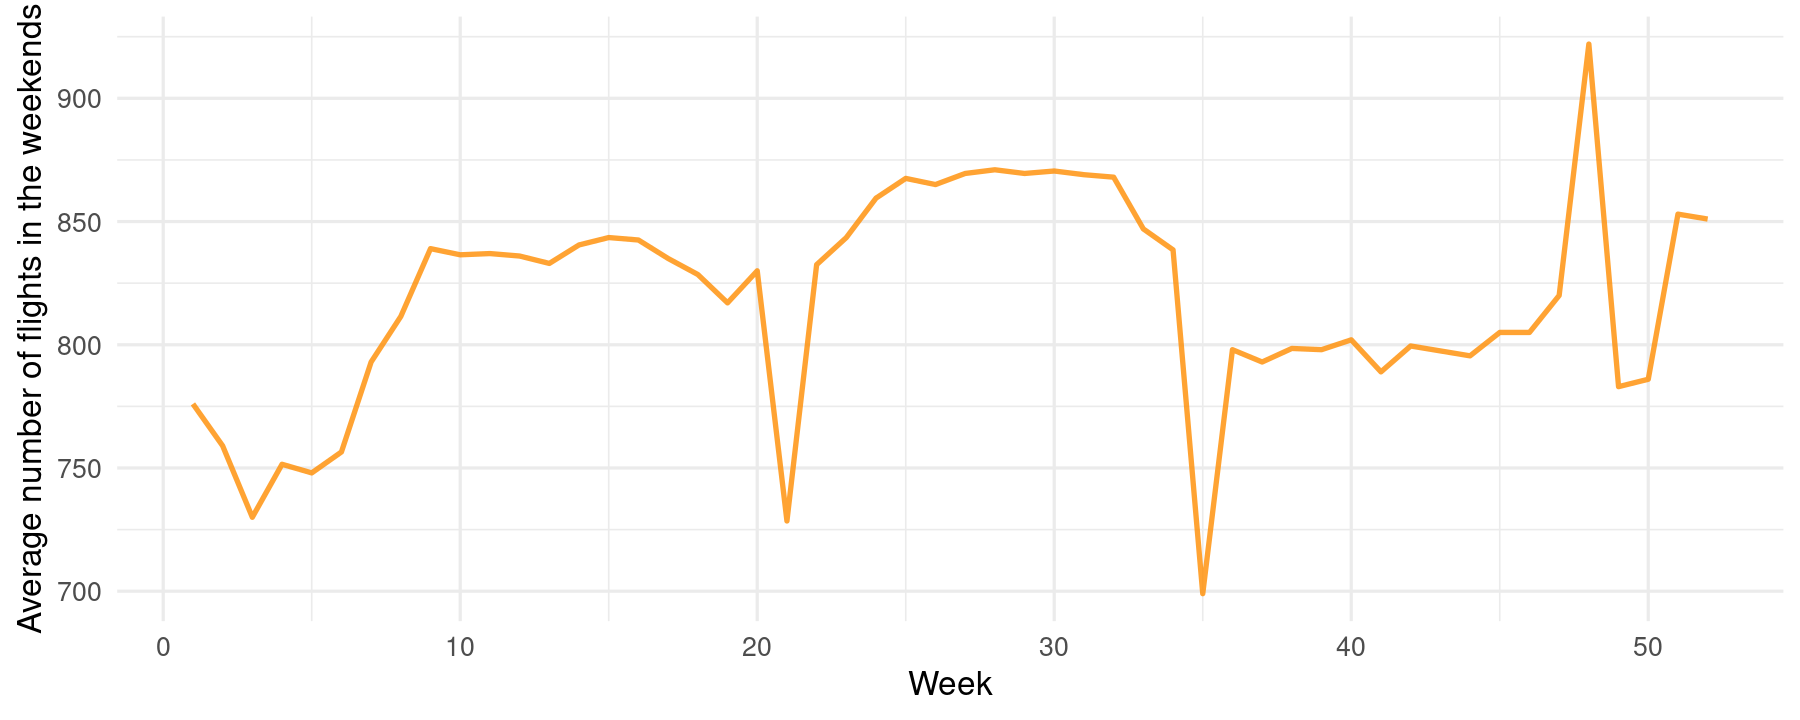

In [22]:
flights_weekdays %>%
    filter(weekday %in% 6:7) %>%
    group_by(week, weekday) %>%
    summarize(w = n()) %>%
    summarise(avg_weekend = mean(w)) %>%
    ggplot(aes(x = week, y = avg_weekend)) +
    geom_line(linewidth=1.5, alpha=0.8, colour="darkorange") +
    theme_minimal(base_size=20) +
    labs(x="Week", y="Average number of flights in the weekends")

### 2) For each flight in the data frame, compute the departure delay and extract the following pieces of information (separately for each NYC airport):
### - min, max and average delay for each day of the year (show the data in corresponding plots)

If we want to find a minimum delay that is greater than or equal to 0, then we can put a constraint on the corresponding variable. However, this does not lead to getting valuable information out of this data:

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


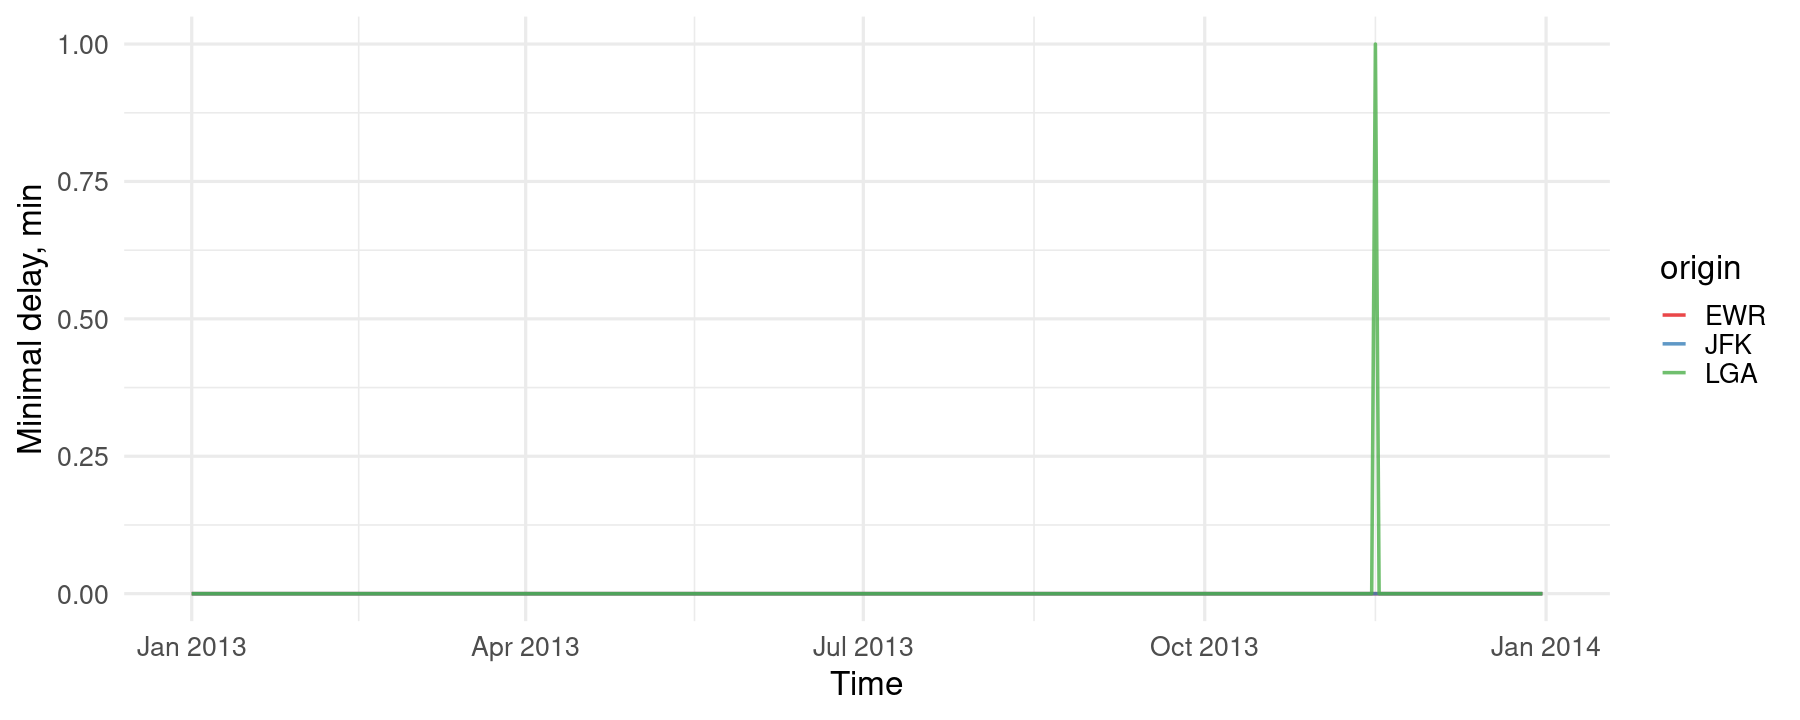

In [23]:
flights %>%
    mutate(date = make_datetime(year, month, day)) %>%
    group_by(date, origin) %>%
    filter(dep_delay>=0) %>%
    summarise(min_d = min(dep_delay, na.rm = TRUE)) %>%
    ggplot(aes(x = date, y = min_d, colour=origin)) +
    geom_line(linewidth=1, alpha=0.8) +
    theme_minimal(base_size=20) +
    labs(x="Time", y="Minimal delay, min") +
    scale_color_brewer(palette = "Set1")

Instead, it is more interesting to look at minimum departure delay without this constraint. We get a departure delay less than 0 meaning that the plain departured earlier than scheduled:

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


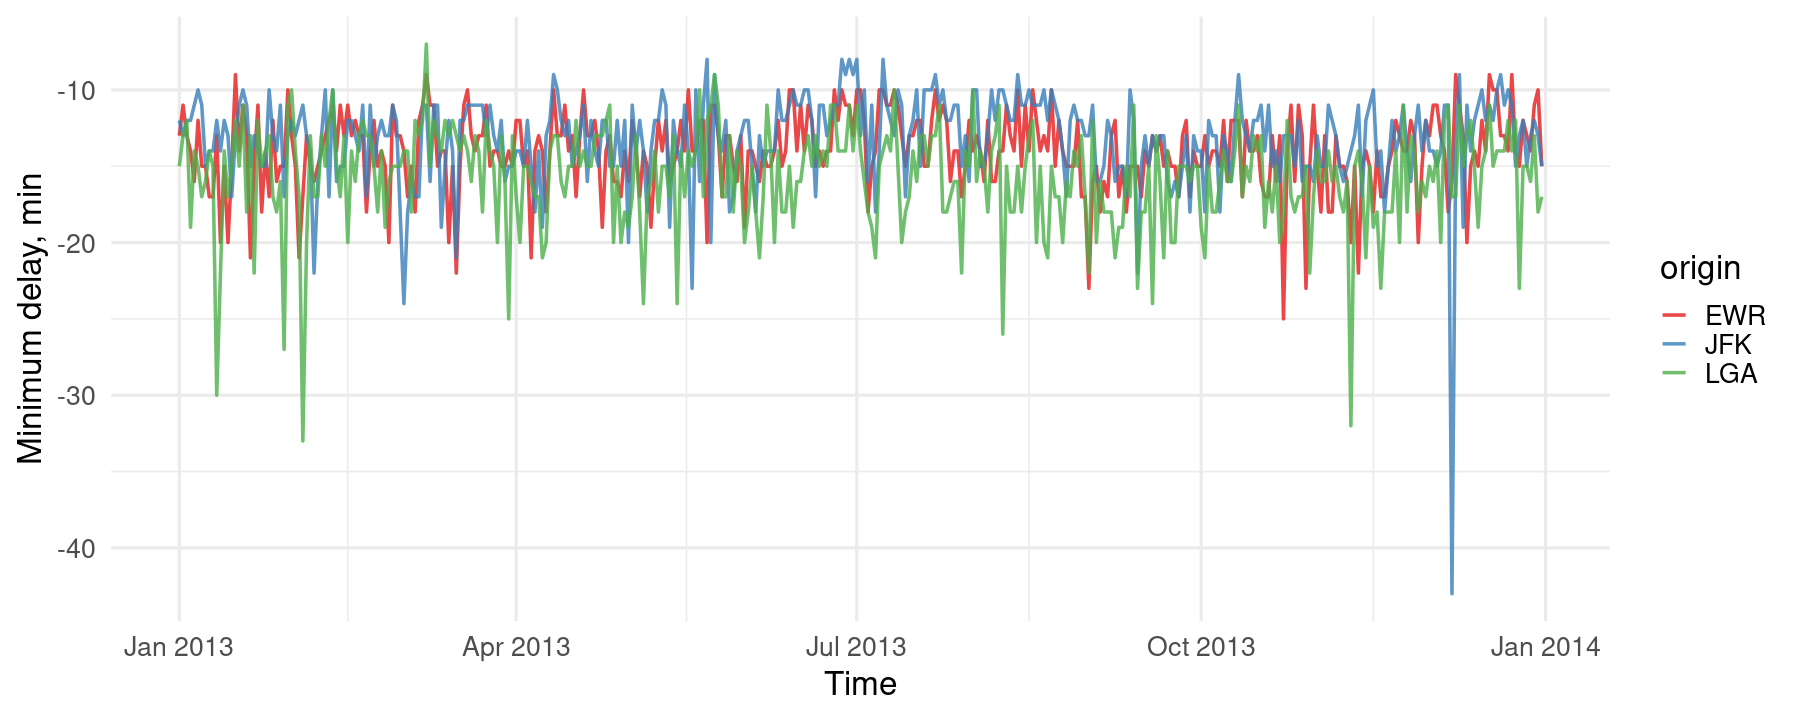

In [24]:
flights %>%
    mutate(date = make_datetime(year, month, day)) %>%
    group_by(date, origin) %>%
    summarise(min_d = min(dep_delay, na.rm = TRUE)) %>%
    ggplot(aes(x = date, y = min_d, colour=origin)) +
    geom_line(linewidth=1, alpha=0.8) +
    theme_minimal(base_size=20) +
    labs(x="Time", y="Minimum delay, min") +
    scale_color_brewer(palette = "Set1")

Maximum and average delays are found in the same manner.

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


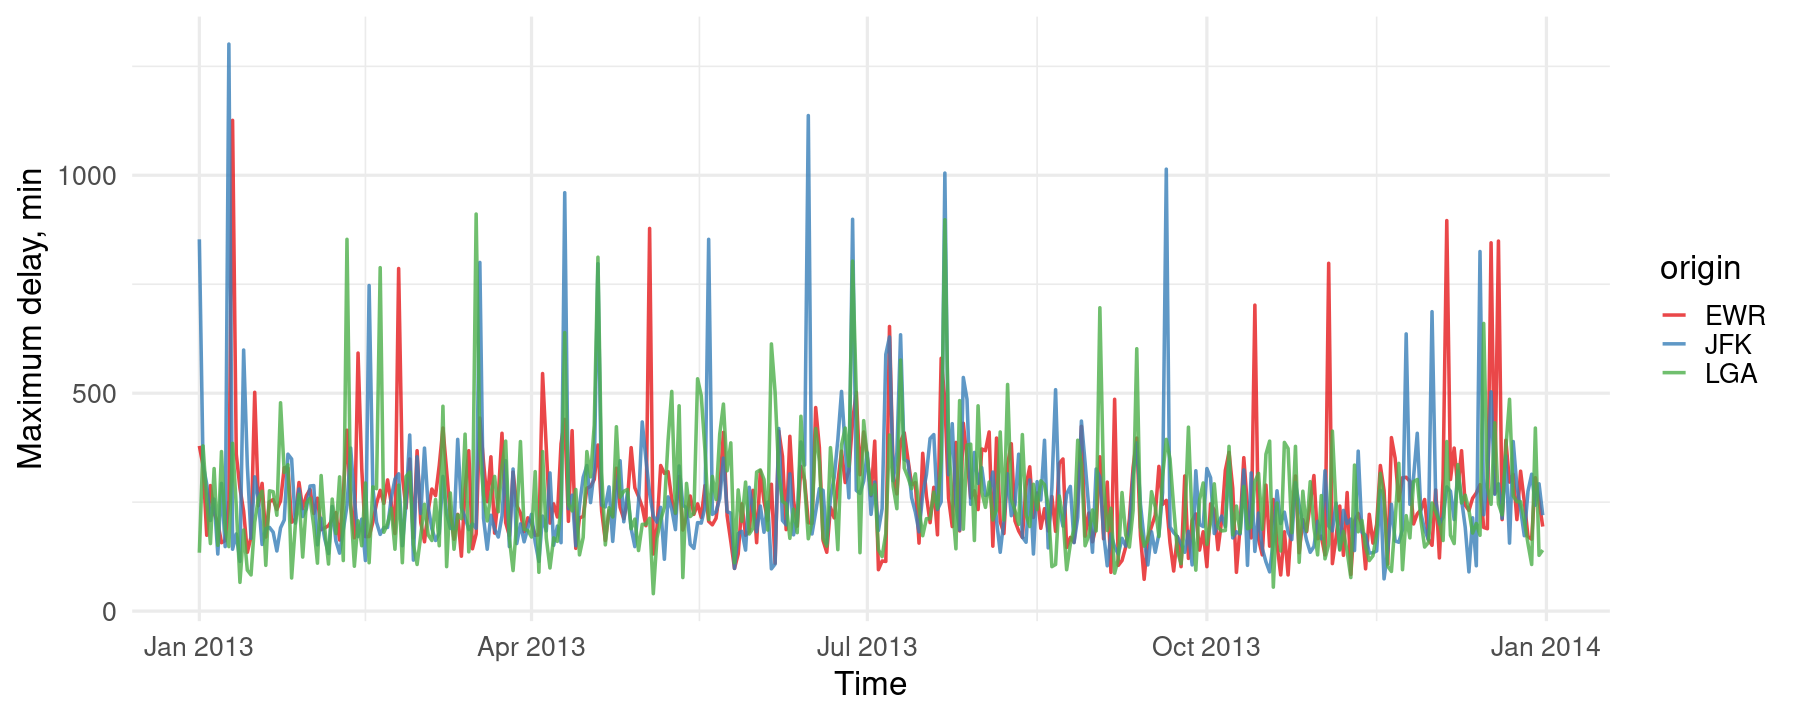

In [25]:
flights %>%
    mutate(date = make_datetime(year, month, day)) %>%
    group_by(date, origin) %>%
    summarise(max_d = max(dep_delay, na.rm = TRUE)) %>%
    ggplot(aes(x = date, y = max_d, colour=origin)) +
    geom_line(linewidth=1, alpha=0.8) +
    theme_minimal(base_size=20) +
    labs(x="Time", y="Maximum delay, min") +
    scale_color_brewer(palette = "Set1")

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


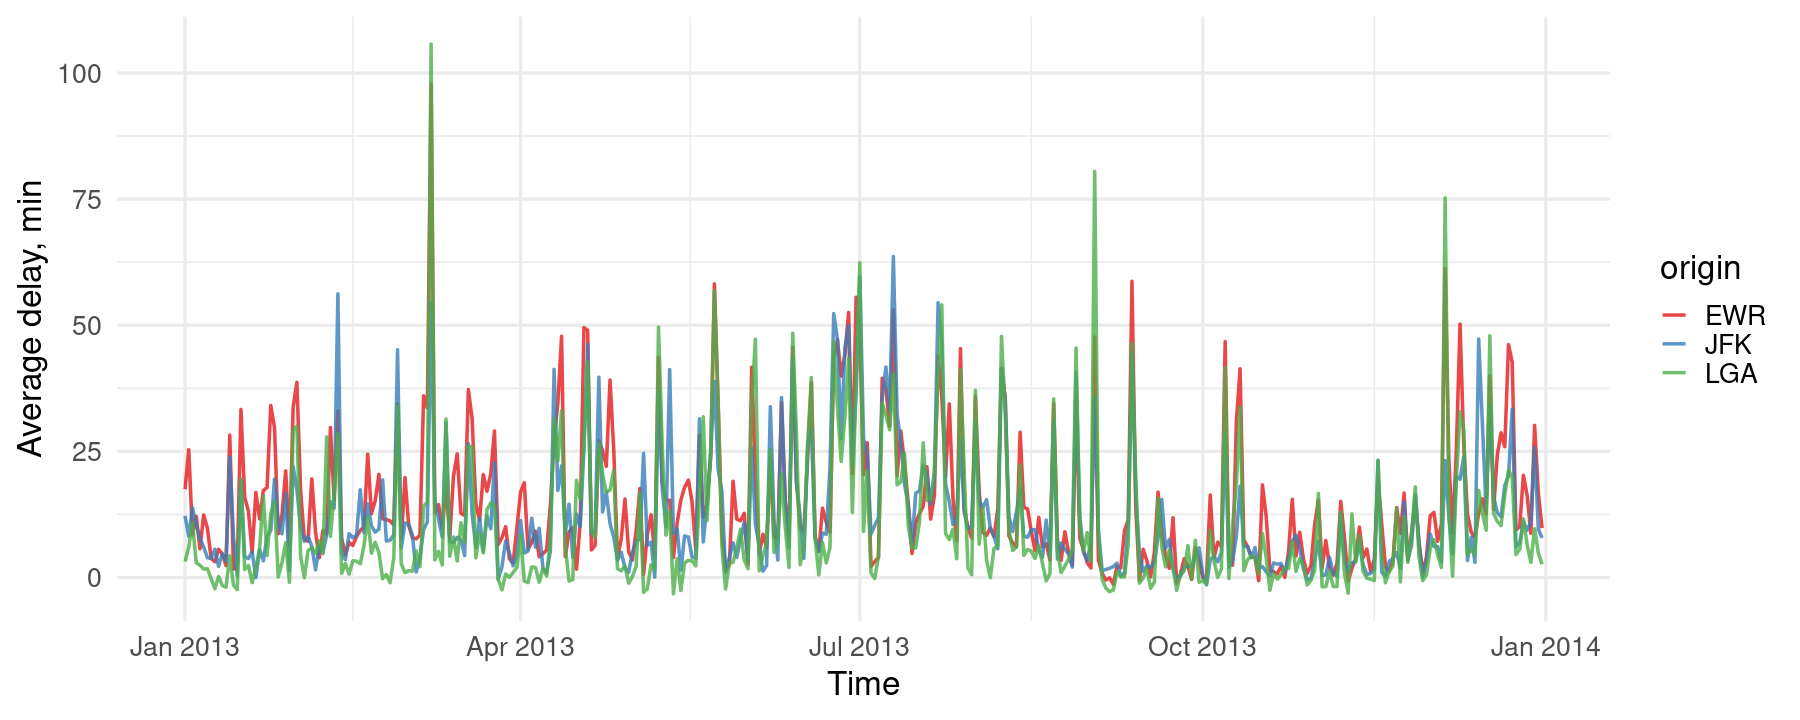

In [26]:
flights %>%
    mutate(date = make_datetime(year, month, day)) %>%
    group_by(date, origin) %>%
    summarise(mean_d = mean(dep_delay, na.rm = TRUE)) %>%
    ggplot(aes(x = date, y = mean_d, colour=origin)) +
    geom_line(linewidth=1, alpha=0.8) +
    theme_minimal(base_size=20) +
    labs(x="Time", y="Average delay, min") +
    scale_color_brewer(palette = "Set1")

### 3) assuming the distance flew by the plane is, at first approximation, the distance between the two connecting airports (as given in the data frame), compute the average speed of each plane. Produce a plot of the average plane speed as a function of departure day of the year

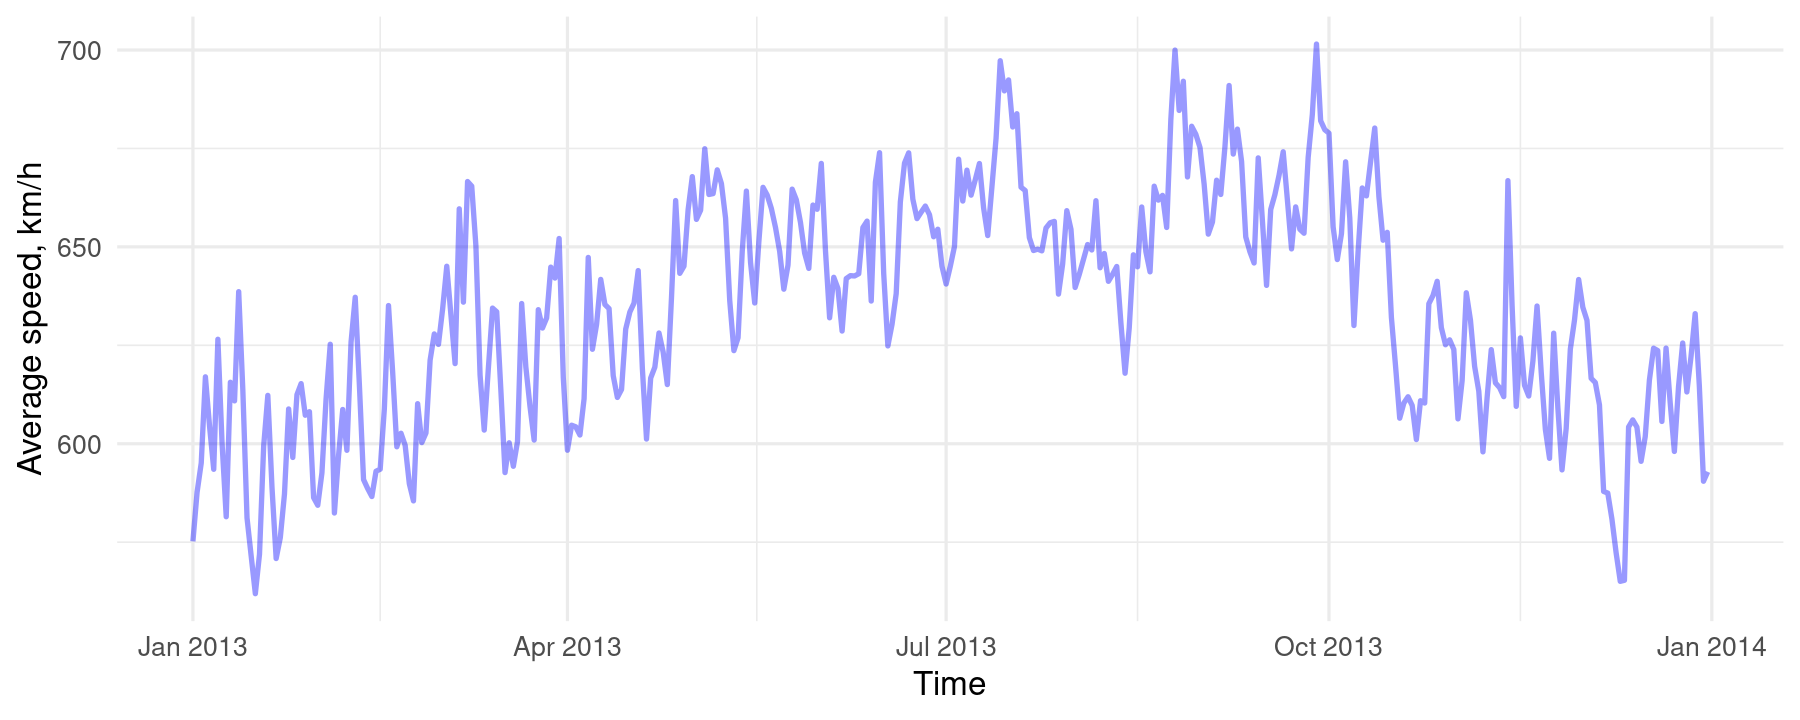

In [27]:
flights %>%
    mutate(date = make_datetime(year, month, day)) %>%
    mutate(speed = (distance*1.60934)/(air_time/60)) %>% #distance converted to km, time to hours
    group_by(date) %>%
    summarise(mean_speed = mean(speed, na.rm = TRUE)) %>%
    ggplot(aes(x = date, y = mean_speed)) +
    geom_line(linewidth=1.5, alpha = 0.4, colour="blue") +
    theme_minimal(base_size=20) +
    labs(x="Time", y="Average speed, km/h")

### 4) analyze the flights offered by each airline company and determine:

### - the airline companies offering the largest two numbers of flights per day and per week;

There can be different approaches towards getting these two largest numbers of flights. First can be just an average number per day, which can be found like this:

In [28]:
flights %>%
    group_by(carrier) %>%
    summarise(flights_num = ceiling(n()/365)) %>%
    arrange(desc(flights_num)) %>%
    head(2) %>%
    inner_join(airlines) %>%
    select(name, flights_num)

Joining with `by = join_by(carrier)`


name,flights_num
<chr>,<dbl>
United Air Lines Inc.,161
JetBlue Airways,150


Obviously, if we find two companies offering two largest number of flights per week in the same manner, we get the same two companies.


The second approach is to find two companies for each week.

In [29]:
flights_weekdays %>%
    group_by(week, carrier) %>%
    summarise(flights_num = n()) %>%
    arrange(week, desc(flights_num)) %>%
    mutate(f = first(flights_num), s = nth(flights_num, 2)) %>% #taking the smallest number of flights (first one at for each month)
    filter(flights_num == f | flights_num == s) %>%
    inner_join(airlines) %>%
    select(week, name, flights_num) -> flights_per_week

print(flights_per_week)

`summarise()` has grouped output by 'week'. You can override using the
`.groups` argument.
Joining with `by = join_by(carrier)`


# A tibble: 106 × 3
# Groups:   week [53]
    week name                  flights_num
   <dbl> <chr>                       <int>
 1     1 JetBlue Airways              1107
 2     1 United Air Lines Inc.        1067
 3     2 United Air Lines Inc.        1034
 4     2 JetBlue Airways               993
 5     3 United Air Lines Inc.        1032
 6     3 JetBlue Airways               968
 7     4 United Air Lines Inc.        1032
 8     4 JetBlue Airways               959
 9     5 United Air Lines Inc.        1042
10     5 JetBlue Airways               965
# … with 96 more rows


In a bar chart there could be found information on how many times each company was in top-2 in number of flights per week:

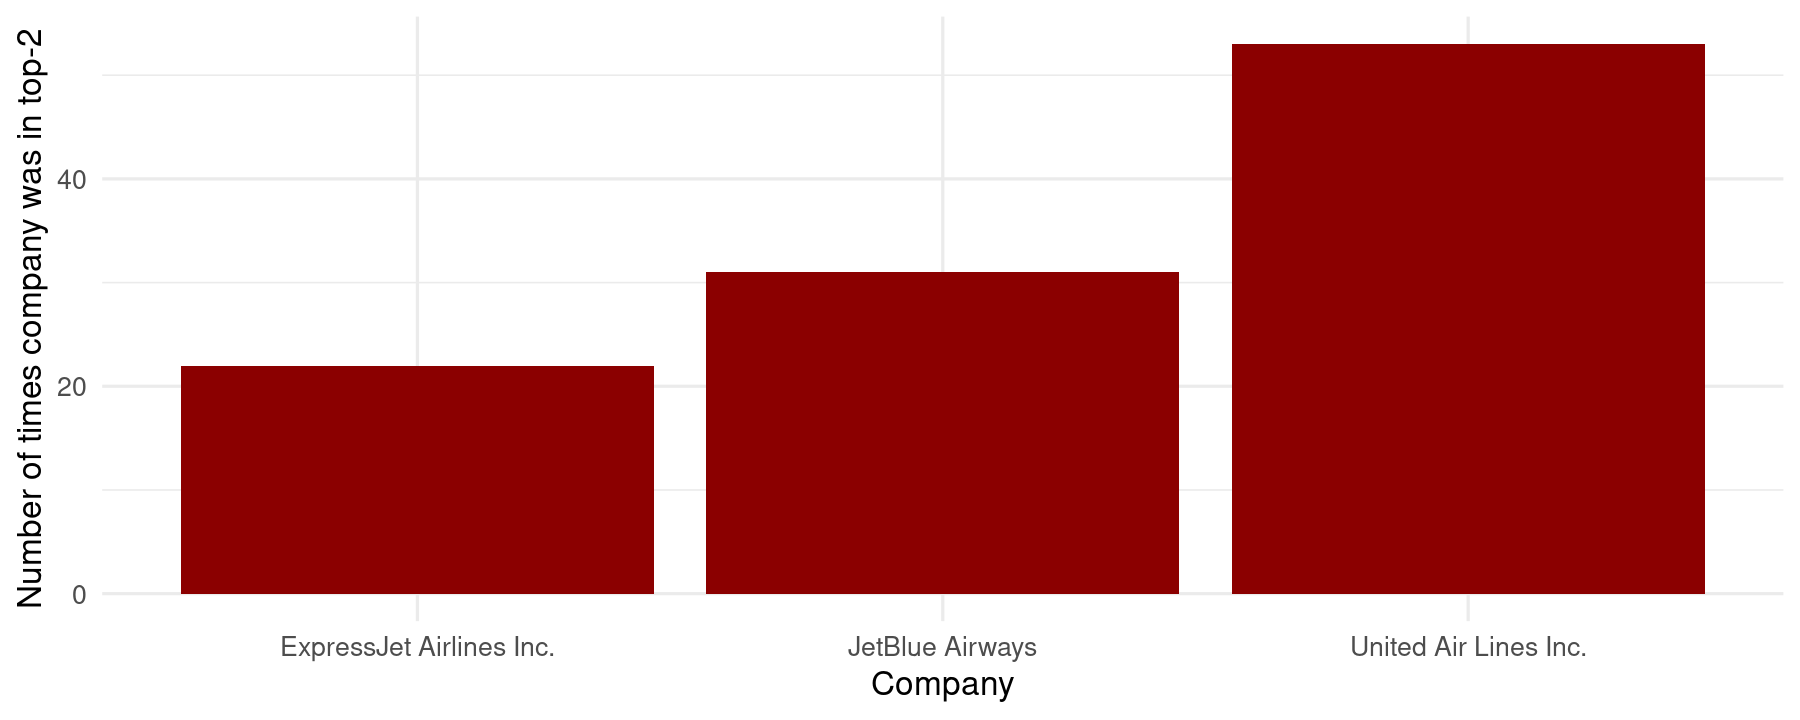

In [30]:
flights_per_week %>%
    ggplot(aes(x=name)) +
    geom_bar(fill='darkred') +
    theme_minimal(base_size=20) +
    labs(x='Company', y = 'Number of times company was in top-2')

### - the airline company offering the smallest number of flights per month;

In [31]:
flights %>%
    select(month, carrier, flight) %>%
    group_by(month, carrier) %>%
    summarise(flights_per_month = n()) %>% #counting all flights offered by each company
    arrange(month, flights_per_month) %>%
    mutate(sm = first(flights_per_month)) %>% #taking the smallest number of flights (first one for each month)
    filter(flights_per_month == sm) %>%
    inner_join(airlines) %>%
    select(month, name, flights_per_month) 

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.
Joining with `by = join_by(carrier)`


month,name,flights_per_month
<int>,<chr>,<int>
1,SkyWest Airlines Inc.,1
2,Hawaiian Airlines Inc.,28
3,Mesa Airlines Inc.,18
4,Hawaiian Airlines Inc.,30
5,Hawaiian Airlines Inc.,31
6,SkyWest Airlines Inc.,2
7,Hawaiian Airlines Inc.,31
8,SkyWest Airlines Inc.,4
9,SkyWest Airlines Inc.,20


### - the airline company offering the longest distance flight per month.

In [32]:
flights %>%
    select(month, carrier, distance) %>%
    group_by(month, carrier) %>%
    summarise(max_distance = max(distance)) %>%
    arrange(desc(max_distance), month) %>%
    head(12) %>%
    inner_join(airlines) %>%
    select(name, month, max_distance)

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.
Joining with `by = join_by(carrier)`


name,month,max_distance
<chr>,<int>,<dbl>
Hawaiian Airlines Inc.,1,4983
Hawaiian Airlines Inc.,2,4983
Hawaiian Airlines Inc.,3,4983
Hawaiian Airlines Inc.,4,4983
Hawaiian Airlines Inc.,5,4983
Hawaiian Airlines Inc.,6,4983
Hawaiian Airlines Inc.,7,4983
Hawaiian Airlines Inc.,8,4983
Hawaiian Airlines Inc.,9,4983
